In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bandit import Bandit
from reinforcement_learning import (
    streaming_cross_learning,
    streaming_maynard_cross_learning,
    parallel_cross_learning,
    parallel_maynard_cross_learning,
)
from analytical_solutions import replicator_dynamic
import matplotlib.gridspec as gridspec

plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42

plt.rcParams["text.latex.preamble"] = r"\usepackage{lmodern} \usepackage{amsmath}"
# Options
params = {
    "text.usetex": True,
    "font.size": 11,
    "font.family": "lmodern",
    #   'text.latex.unicode': True,
}
plt.rcParams.update(params)

# Supp old streaming plots


In [ ]:
for alpha in [0.001,0.1]:
        for name in ['near zero','near one','evenly spaced']:
        
                bandit = Bandit(n_action=10,mean=0,variance=1, name=name)
                # print(bandit.s_q_star)
                if alpha == 0.001:
                        runs = 100000
                        epochs = 100
                
                else:
                        runs = 1000
                        epochs = 100
                        
                alpha = alpha
                alpha_baseline = 0.01

                reward_overall_cl, optimal_actions_cl = cross_learning(runs,epochs,alpha,bandit)
                mean_reward_trd = taylor_replicator_dynamics(alpha,bandit,runs)
                reward_overall_mcl, optimal_actions_mcl = maynard_cross_learning(runs,epochs,alpha,alpha_baseline,bandit)
                mean_reward_mrd = maynard_replicator_dynamics(alpha,bandit,runs)

                #plot stuff
                plt.rcParams['figure.figsize'] = [7, 2.5]
                fig = plt.figure(constrained_layout=True)
                gs = fig.add_gridspec(2, 3)
                ax0 = fig.add_subplot(gs[:, 0])
                ax1 = fig.add_subplot(gs[0, 1])
                ax2 = fig.add_subplot(gs[1, 1])
                ax3 = fig.add_subplot(gs[:, 2])
                fontsize=10
                plt.rcParams.update({'font.size': fontsize})
                ax2.sharex(ax1)
                ax3.sharex(ax1)
                
                colors = ['#1f77b4', '#ff7f0e', '#ff4b33', '#00008b']
                lines_labels=[]

                max_cl = max(reward_overall_cl.numpy().mean(axis=1) + reward_overall_cl.numpy().std(axis=1))
                max_mcl = max(reward_overall_mcl.numpy().mean(axis=1) + reward_overall_mcl.numpy().std(axis=1))
                max_reward = max_cl if max_cl > max_mcl else max_mcl
                min_cl = min(reward_overall_cl.numpy().mean(axis=1) - reward_overall_cl.numpy().std(axis=1))
                min_mcl = min(reward_overall_mcl.numpy().mean(axis=1) - reward_overall_mcl.numpy().std(axis=1))
                min_reward = min_cl if min_cl < min_mcl else min_mcl


                reward_steps = (max_reward - min_reward)/6
                # print(min_reward,max_reward)
                # print(reward_steps)
                reward_ticks = [min_reward+i*reward_steps for i in range(7)]
                # print(reward_ticks)

                step_x = runs/5


                ax0.plot(range(runs),mean_reward_trd, label='TRD', color=colors[3], linestyle='dotted', linewidth=2, alpha=0.5)
                ax0.plot(range(runs),mean_reward_mrd, label='MRD', color=colors[2], linestyle='dotted', linewidth=2, alpha=0.5)
                ax0.set_yticks(reward_ticks)
                ax0.set_yticklabels([f'{i:.2f}' for i in reward_ticks], fontsize=8)
                ax0.set_ylim(reward_ticks[0],reward_ticks[-1])
                ax0.set_ylabel('Reward', fontsize=fontsize)
                
                if alpha == 0.001:
                        ax0.set_xticks([i for i in np.arange(0,round(runs+step_x),step_x)])
                        ax0.set_xticklabels([f'{i/1000:.0f}' for i in np.arange(0,round(runs+step_x),step_x)], fontsize=fontsize)
                
                else:
                        ax0.set_xticks([i for i in np.arange(0,round(runs+step_x),step_x)])
                        ax0.set_xticklabels([f'{i/10:.0f}' for i in np.arange(0,round(runs+step_x),step_x)], fontsize=fontsize)


                if alpha == 0.001:
                        ax1.set_xticks([i for i in np.arange(0,round(runs+step_x),step_x)])
                        ax1.set_xticklabels([f'{i/1000:.0f}k' for i in np.arange(0,round(runs+step_x),step_x)], fontsize=fontsize)

                else:
                        ax1.set_xticks([i for i in np.arange(0,round(runs+step_x),step_x)])
                        ax1.set_xticklabels([f'{i:.0f}' for i in np.arange(0,round(runs+step_x),step_x)], fontsize=fontsize)


                ax1.plot(range(runs),reward_overall_cl.numpy().mean(axis=1), label='CL', color=colors[0], alpha=0.5)
                ax1.plot(range(runs),mean_reward_trd, label='TRD', color=colors[3], linestyle='dotted', alpha=0.5, linewidth=2)
                ax1.fill_between(range(runs),reward_overall_cl.numpy().mean(axis=1) - reward_overall_cl.numpy().std(axis=1),reward_overall_cl.numpy().mean(axis=1) + reward_overall_cl.numpy().std(axis=1),facecolor=colors[0], alpha=0.2)
                ax2.plot(range(runs),reward_overall_mcl.numpy().mean(axis=1), label='MCL', color=colors[1], alpha=0.5)
                ax2.plot(range(runs),mean_reward_mrd, label='MRD', color=colors[2], linestyle='dotted', alpha=0.5, linewidth=2)
                ax2.fill_between(range(runs),reward_overall_mcl.numpy().mean(axis=1) - reward_overall_mcl.numpy().std(axis=1),reward_overall_mcl.numpy().mean(axis=1) + reward_overall_mcl.numpy().std(axis=1),facecolor=colors[1], alpha=0.2)
                
                # show only three points in the y axis
                small_ticks = [reward_ticks[0],reward_ticks[int(7/2)],reward_ticks[-1]]
                ax1.set_yticks(small_ticks)
                ax1.set_yticklabels([f'{i:.1f}' for i in small_ticks], fontsize=8)
                ax2.set_yticks(small_ticks)
                ax2.set_yticklabels([f'{i:.1f}' for i in small_ticks], fontsize=8)

                ax1.tick_params(labelbottom=False)
                ax2.set_xlabel('Steps', fontsize=fontsize)



                ax3.plot(range(runs),optimal_actions_mcl.mean(axis=1)*100,label='MCL', color=colors[1], alpha=0.7)
                ax3.plot(range(runs),optimal_actions_cl.mean(axis=1)*100,label='CL', color=colors[0], alpha=0.7)
                ax3.yaxis.tick_right()
                ax3.yaxis.set_label_position("right")
                ax3.set_yticks([i for i in np.arange(0,120,20)])
                ax3.set_yticklabels([f'{i}' for i in np.arange(0,120,20)], fontsize=8)
                ax3.set_ylabel(r'$\%$ Optimal actions', fontsize=fontsize, rotation=270)
                ax0.set_xlabel('Time', fontsize=fontsize)
                ax3.set_xlabel('Steps', fontsize=fontsize)


                # set legend outside the plot
                
                lines_labels = [ax0.get_legend_handles_labels()]
                lines_labels.append(ax3.get_legend_handles_labels())
                lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

                if alpha == 0.001:
                        alpha_name = 'Small'
                else:
                        alpha_name = 'Large'

                if name == "evenly spaced":
                        title_name = 'Spread'
                        title = r"$q^{\pi}_a$'s: "+str(title_name)+ r", $\alpha$: " + str(alpha_name)

                elif name == "near zero":
                        title_name = 'Low'
                        title = r"$q^{\pi}_a$'s: "+str(title_name)+ r", $\alpha$: " + str(alpha_name)
                
                else:                
                        title_name = 'High'
                        title = r"$q^{\pi}_a$'s: "+str(title_name)+ r", $\alpha$: " + str(alpha_name)

                
                fig.suptitle(title, fontsize=12)
                if (title_name == 'High') or (title_name == 'Spread' and alpha_name == 'Large'):
                        # fig.text(0.5, -0.02, 'Runs', ha='center', va='center', fontsize=fontsize)
                        fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.03), ncol=4, fontsize=fontsize)
                
                plt.savefig(f"rl_streaming_scenario_{title_name}_alpha_{alpha_name}.pdf", bbox_inches='tight',dpi=900)



# Refactor new streaming plots


0
1
2
3
4
5


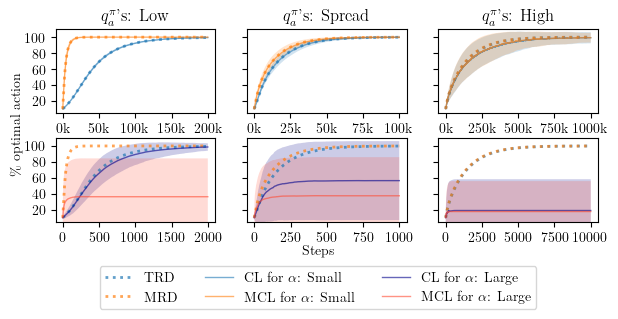

In [2]:
alphas = [0.001, 0.1]

names = ["near zero", "evenly spaced", "near one"]
names_dict = {
    names[0]: "Low",
    names[1]: "Spread",
    names[2]: "High",
}
alpha_dict = {
    alphas[0]: "Small",
    alphas[1]: "Large",
}
steps_dict = {
    names[0]: {alphas[0]: 200000, alphas[1]: 2000},
    names[1]: {alphas[0]: 100000, alphas[1]: 1000},
    names[2]: {alphas[0]: 1000000, alphas[1]: 10000},
}

seeds = 1000
alpha_baseline = 0.01
fontsize = 10

# plot stuff
plt.rcParams.update({"font.size": fontsize})
colors = ["#1f77b4", "#00008b", "#ff7f0e", "#ff4b33"]

# create 6 subplots top for small alphas and down for large alphas

fig = plt.figure(figsize=(7, 2.5))  # or use tight_layout() later
outer = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.2)
fig.text(0.06, 0.5, r"$\%$ optimal action", va="center", rotation="vertical")
fig.text(0.5, -0.02, "Steps", ha="center")

axs = []
for i, name in enumerate(names):
    inner = gridspec.GridSpecFromSubplotSpec(
        2, 1, subplot_spec=outer[i], height_ratios=[1, 1], hspace=0.3
    )
    steps = steps_dict[name]
    if i == 0:
        ax0 = fig.add_subplot(inner[0])
        ax1 = fig.add_subplot(inner[1], sharey=ax0)

        ax0.set_yticks(np.arange(20, 120, 20))
        ax0.set_yticklabels([f"{i:.0f}" for i in np.arange(20, 120, 20)])
        ax0.set_ylim(5, 110)

    else:
        ax0 = fig.add_subplot(inner[0], sharey=axs[0])
        ax1 = fig.add_subplot(inner[1], sharey=axs[0])

        ax0.tick_params(labelleft=False)
        ax1.tick_params(labelleft=False)

    ax0.set_xticks(
        np.arange(
            0,
            steps[alphas[0]] + int(steps[alphas[0]] / 4),
            int(steps[alphas[0]] / 4),
        )
    )
    ax0.set_xticklabels(
        [
            f"{i/1000:.0f}k"
            for i in np.arange(
                0,
                steps[alphas[0]] + int(steps[alphas[0]] / 4),
                int(steps[alphas[0]] / 4),
            )
        ]
    )

    ax1.set_xticks(
        np.arange(
            0,
            steps[alphas[1]] + int(steps[alphas[1]] / 4),
            int(steps[alphas[1]] / 4),
        )
    )
    ax1.set_xticklabels(
        [
            f"{i:.0f}"
            for i in np.arange(
                0,
                steps[alphas[1]] + int(steps[alphas[1]] / 4),
                int(steps[alphas[1]] / 4),
            )
        ]
    )

    ax0.title.set_text(r"$q^{{\pi}}_a$'s: " + f"{names_dict[names[i]]}")

    axs.append(ax0)
    axs.append(ax1)


for i, ax in enumerate(axs):
    print(i)
    if i % 2 == 0:
        j = 0
        name = names[int(i / 2)]
        bandit = Bandit(name=names[int(i / 2)])
        alpha = alphas[0]
        step = steps_dict[name][alpha]

    else:
        j = 1
        alpha = alphas[1]
        step = steps_dict[name][alpha]

    _, optimal_action_trd = replicator_dynamic(
        delta=alpha, bandit=bandit, steps=step, trd=True
    )

    _, optimal_action_mrd = replicator_dynamic(
        delta=alpha, bandit=bandit, steps=step, trd=False
    )

    _, optimal_action_cl = streaming_cross_learning(
        steps=step, seeds=seeds, alpha=alpha, bandit=bandit
    )

    optimal_action_cl = optimal_action_cl.numpy()

    ax.plot(
        range(step),
        optimal_action_trd * 100,
        label="TRD",
        color=colors[0],
        linestyle="dotted",
        linewidth=2,
        alpha=0.7,
    )

    del optimal_action_trd

    ax.plot(
        range(step),
        optimal_action_mrd * 100,
        label="MRD",
        color=colors[2],
        linestyle="dotted",
        linewidth=2,
        alpha=0.7,
    )

    del optimal_action_mrd

    ax.plot(
        range(step),
        optimal_action_cl.mean(axis=1) * 100,
        label=r"CL for $\alpha$: " + f"{alpha_dict[alpha]}",
        color=colors[0 + j],
        linewidth=1,
        alpha=0.6,
    )

    ax.fill_between(
        range(step),
        optimal_action_cl.mean(axis=1) * 100 - optimal_action_cl.std(axis=1) * 100,
        optimal_action_cl.mean(axis=1) * 100 + optimal_action_cl.std(axis=1) * 100,
        facecolor=colors[0 + j],
        alpha=0.2,
    )

    del optimal_action_cl

    _, optimal_action_mcl = streaming_maynard_cross_learning(
        steps=step,
        seeds=seeds,
        alpha=alpha,
        alpha_baseline=alpha_baseline,
        bandit=bandit,
    )

    optimal_action_mcl = optimal_action_mcl.numpy()

    ax.plot(
        range(step),
        optimal_action_mcl.mean(axis=1) * 100,
        label=r"MCL for $\alpha$: " + f"{alpha_dict[alpha]}",
        color=colors[2 + j],
        linewidth=1,
        alpha=0.6,
    )

    ax.fill_between(
        range(step),
        optimal_action_mcl.mean(axis=1) * 100 - optimal_action_mcl.std(axis=1) * 100,
        optimal_action_mcl.mean(axis=1) * 100 + optimal_action_mcl.std(axis=1) * 100,
        facecolor=colors[2 + j],
        alpha=0.2,
    )

    del optimal_action_mcl


lines_labels = [axs[0].get_legend_handles_labels(), axs[1].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
unique = dict(zip(labels, lines))

fig.legend(
    unique.values(),
    unique.keys(),
    loc="upper center",
    bbox_to_anchor=(0.5, -0.04),
    ncol=3,
    fontsize=fontsize,
)


plt.savefig(f"streaming_rl_experiments.pdf", bbox_inches="tight", dpi=900)

# Supp parallel plots

In [ ]:
batch_sizes = [10, 1000]
runs = 100
epochs = 100


for name in ['near zero','near one','evenly spaced']:
    for batch_size in batch_sizes:
        bandit = Bandit(n_action=10, mean=0, variance=1, name=name)
        mean_rewards_bcl, optimal_action_bcl  = batched_cross_learning(runs, epochs, bandit, batch_size)
        mean_rewards_bmcl, optimal_action_bmcl  = batched_maynard_learning(runs, epochs, bandit, batch_size)
        mean_rewards_trd = taylor_replicator_dynamics(1, bandit, runs)
        mean_rewards_mrd = maynard_replicator_dynamics(1, bandit, runs)


        #plot stuff
        plt.rcParams['figure.figsize'] = [7, 2.5]
        fig = plt.figure(constrained_layout=True)
        gs = fig.add_gridspec(2, 3)
        ax0 = fig.add_subplot(gs[:, 0])
        ax1 = fig.add_subplot(gs[0, 1])
        ax2 = fig.add_subplot(gs[1, 1])
        ax3 = fig.add_subplot(gs[:, 2])
        fontsize=10
        plt.rcParams.update({'font.size': fontsize})
        ax2.sharex(ax1)
        ax3.sharex(ax1)


        # axs[2].sharex(axs[3])

        colors = ['#1f77b4', '#ff7f0e', '#ff4b33', '#00008b']
        lines_labels=[]

        max_bcl = max(mean_rewards_bcl.mean(axis=1) + mean_rewards_bcl.std(axis=1))
        max_bmcl = max(mean_rewards_bmcl.mean(axis=1) + mean_rewards_bmcl.std(axis=1))
        max_reward = max_bcl if max_bcl > max_bmcl else max_bmcl
        min_bcl = min(mean_rewards_bcl.mean(axis=1) - mean_rewards_bcl.std(axis=1))
        min_bmcl = min(mean_rewards_bmcl.mean(axis=1) - mean_rewards_bmcl.std(axis=1))
        min_reward = min_bcl  if min_bcl < min_bmcl else min_bmcl



        reward_steps = (max_reward  - min_reward)/6 + 0.1/6
        reward_ticks = [min_reward - 0.05 + i*reward_steps for i in range(7)]
        step_x = runs/5
        # reward_steps = (max_reward - min_reward)/6
        # # print(min_reward,max_reward)
        # # print(reward_steps)
        # reward_ticks = [min_reward+i*reward_steps for i in range(7)]
        # # print(reward_ticks)

        # step_x = runs/5


        ax0.plot(range(runs),mean_rewards_trd, label='TRD', color=colors[3], linestyle='dotted', linewidth=2, alpha=0.5)
        ax0.plot(range(runs),mean_rewards_mrd, label='MRD', color=colors[2], linestyle='dotted', linewidth=2, alpha=0.5)

        
        ax0.set_ylim(reward_ticks[0],reward_ticks[-1])
        ax0.set_yticks(reward_ticks)
        ax0.set_yticklabels([f'{i:.2f}' for i in reward_ticks], fontsize=8)
        ax0.set_xticks([i for i in np.arange(0,runs+step_x,step_x)])
        ax0.set_ylabel('Reward', fontsize=fontsize)
        
        ax0.set_xticklabels([f'{i:.0f}' for i in np.arange(0,runs+step_x,step_x)], fontsize=fontsize)
        ax0.set_xlabel('Time', fontsize=fontsize)


        # show only three points in the y axis
        small_ticks = [reward_ticks[0],reward_ticks[int(7/2)],reward_ticks[-1]]
        ax1.set_ylim(reward_ticks[0],reward_ticks[-1])
        ax2.set_ylim(reward_ticks[0],reward_ticks[-1])
        ax1.set_yticks(small_ticks)
        ax1.set_yticklabels([f'{i:.2f}' for i in small_ticks], fontsize=8)
        ax2.set_yticks(small_ticks)
        ax2.set_yticklabels([f'{i:.2f}' for i in small_ticks], fontsize=8)

        ax1.tick_params(labelbottom=False)
        ax2.set_xticks([i for i in np.arange(0,runs+step_x,step_x)])
        ax2.set_xticklabels([f'{i:.0f}' for i in np.arange(0,runs+step_x,step_x)], fontsize=fontsize)
        ax2.set_xlabel('Steps', fontsize=fontsize)
        
        ax1.plot(range(runs),mean_rewards_bcl.mean(axis=1), label='P-CL', color=colors[0], alpha=0.5, linewidth=4)
        ax1.plot(range(runs),mean_rewards_trd, label='TRD', color=colors[3], linestyle='dotted', linewidth=2, alpha=0.5)
        ax1.fill_between(range(runs),mean_rewards_bcl.mean(axis=1) - mean_rewards_bcl.std(axis=1),mean_rewards_bcl.mean(axis=1) + mean_rewards_bcl.std(axis=1),facecolor=colors[0], alpha=0.2)
        ax2.plot(range(runs),mean_rewards_bmcl.mean(axis=1), label='P-MCL', color=colors[1], alpha=0.5, linewidth=4)
        ax2.plot(range(runs),mean_rewards_mrd, label='MRD', color=colors[2], linestyle='dotted', linewidth=2, alpha=0.5)
        ax2.fill_between(range(runs),mean_rewards_bmcl.mean(axis=1) - mean_rewards_bmcl.std(axis=1),mean_rewards_bmcl.mean(axis=1) + mean_rewards_bmcl.std(axis=1),facecolor=colors[1], alpha=0.2)


        ax3.plot(range(runs),optimal_action_bcl.mean(axis=1)*100,label='P-CL', color=colors[0], alpha=0.7)
        ax3.plot(range(runs),optimal_action_bmcl.mean(axis=1)*100,label='P-MCL', color=colors[1], alpha=0.7)
        ax3.yaxis.tick_right()
        ax3.yaxis.set_label_position("right")
        ax3.set_yticks([i for i in np.arange(20,120,20)])
        ax3.set_yticklabels([f'{i}' for i in np.arange(20,120,20)], fontsize=fontsize)
        ax3.set_ylabel(r'$\%$ Optimal action', fontsize=fontsize, rotation=270)
        ax3.set_xlabel('Steps', fontsize=fontsize)


        if batch_size == 10:
                        batch_size_name = 'Small'
        else:
                        batch_size_name = 'Large'

        if name == "evenly spaced":
                        title_name = 'Spread'
                        title = r"$q^{\pi}_a$'s: "+str(title_name)+ r", $B$: " + str(batch_size_name)

        elif name == "near zero":
                        title_name = 'Low'
                        title = r"$q^{\pi}_a$'s: "+str(title_name)+ r", $B$: " + str(batch_size_name)
                
        else:                
                        title_name = 'High'
                        title = r"$q^{\pi}_a$'s: "+str(title_name)+ r", $B$: " + str(batch_size_name)


        # set common x-axis label
        if (batch_size_name == "Large") and (title_name == "Spread" or title_name == "High"):
            # fig.text(0.5, -0.02, 'Runs', ha='center', va='center', fontsize=fontsize)
            fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=4, fontsize=fontsize)

        # set legend outside the plot
        
        lines_labels = [ax0.get_legend_handles_labels()]
        lines_labels.append(ax3.get_legend_handles_labels())
        lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]


        fig.suptitle(title, fontsize=12)
        plt.savefig(f"RL_parallel_scenario_{title_name}_parallel_{batch_size_name}.pdf", bbox_inches='tight',dpi=900)

# Refactor Parallel RL plots


In [ ]:
parallel_envs = [2000, 10]
names = ["near zero", "evenly spaced", "near one"]
names_dict = {
    names[0]: "Low",
    names[1]: "Spread",
    names[2]: "High",
}
parallel_envs_dict = {
    parallel_envs[0]: "Small",
    parallel_envs[1]: "Large",
}
steps_dict = {names[0]: 200, names[1]: 100, names[2]: 1000}

seeds = 1000
fontsize = 10

# plot stuff
plt.rcParams.update({"font.size": fontsize})
colors = ["#1f77b4", "#00008b", "#ff7f0e", "#ff4b33"]


fig = plt.figure(figsize=(7, 2.5))  # or use tight_layout() later
outer = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.1)
fig.text(0.06, 0.5, r"$\%$ optimal action", va="center", rotation="vertical")
fig.text(0.5, -0.02, "Steps", ha="center")

axs = []
for i, name in enumerate(names):
    inner = gridspec.GridSpecFromSubplotSpec(
        2, 1, subplot_spec=outer[i], height_ratios=[1, 1], hspace=0.3
    )
    step = steps_dict[name]
    steps_increment = int(step / 5)
    if i == 0:
        ax0 = fig.add_subplot(inner[0])
        ax1 = fig.add_subplot(inner[1], sharey=ax0, sharex=ax0)

        ax0.set_yticks(np.arange(20, 120, 20))
        ax0.set_yticklabels([f"{i:.0f}" for i in np.arange(20, 120, 20)])
        ax0.set_ylim(5, 110)

        ax0.set_xticks(np.arange(0, step + steps_increment, steps_increment))
        ax0.set_xticklabels(
            [f"{i:.0f}" for i in np.arange(0, step + steps_increment, steps_increment)]
        )
        ax0.tick_params(labelbottom=False)

    else:
        ax0 = fig.add_subplot(inner[0], sharey=axs[0])
        ax1 = fig.add_subplot(inner[1], sharex=ax0, sharey=axs[0])
        ax0.set_xticks(np.arange(0, step + steps_increment, steps_increment))
        ax0.set_xticklabels(
            [f"{i:.0f}" for i in np.arange(0, step + steps_increment, steps_increment)]
        )
        ax0.tick_params(labelleft=False, labelbottom=False)
        ax1.tick_params(labelleft=False)

    ax0.title.set_text(r"$q^{{\pi}}_a$'s: " + f"{names_dict[names[i]]}")

    axs.append(ax0)
    axs.append(ax1)

for i, ax in enumerate(axs):

    if i % 2 == 0:
        j = 0
        name = names[int(i / 2)]
        bandit = Bandit(name=name)
        parallel_env = parallel_envs[0]
    else:
        j = 1
        parallel_env = parallel_envs[1]

    step = steps_dict[name]

    mean_rewards_trd, optimal_action_trd = replicator_dynamic(
        delta=1, bandit=bandit, steps=step, trd=True
    )

    mean_rewards_mrd, optimal_action_mrd = replicator_dynamic(
        delta=1, bandit=bandit, steps=step, trd=False
    )

    mean_rewards_pcl, optimal_action_pcl = parallel_cross_learning(
        steps=step, seeds=seeds, bandit=bandit, parallel_envs=parallel_env
    )

    mean_rewards_pmcl, optimal_action_pmcl = parallel_maynard_cross_learning(
        steps=step,
        seeds=seeds,
        bandit=bandit,
        parallel_envs=parallel_env,
    )

    ax.plot(
        range(step),
        optimal_action_trd * 100,
        label="TRD",
        color=colors[0],
        linestyle="dotted",
        linewidth=2,
        alpha=0.7,
    )
    ax.plot(
        range(step),
        optimal_action_mrd * 100,
        label="MRD",
        color=colors[2],
        linestyle="dotted",
        linewidth=2,
        alpha=0.7,
    )

    ax.plot(
        range(step),
        optimal_action_pcl.mean(axis=1) * 100,
        label=r"P-CL for $B$: " + f"{parallel_envs_dict[parallel_env]}",
        color=colors[0 + j],
        linewidth=1,
        alpha=0.6,
    )

    ax.fill_between(
        range(step),
        optimal_action_pcl.mean(axis=1) * 100 - optimal_action_pcl.std(axis=1) * 100,
        optimal_action_pcl.mean(axis=1) * 100 + optimal_action_pcl.std(axis=1) * 100,
        facecolor=colors[0 + j],
        alpha=0.2,
    )

    ax.plot(
        range(step),
        optimal_action_pmcl.mean(axis=1) * 100,
        label=r"P-MCL for $\alpha$: " + f"{parallel_envs_dict[parallel_env]}",
        color=colors[2 + j],
        linewidth=1,
        alpha=0.6,
    )

    ax.fill_between(
        range(step),
        optimal_action_pmcl.mean(axis=1) * 100 - optimal_action_pmcl.std(axis=1) * 100,
        optimal_action_pmcl.mean(axis=1) * 100 + optimal_action_pmcl.std(axis=1) * 100,
        facecolor=colors[2 + j],
        alpha=0.2,
    )


lines_labels = [axs[0].get_legend_handles_labels(), axs[1].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
unique = dict(zip(labels, lines))

fig.legend(
    unique.values(),
    unique.keys(),
    loc="upper center",
    bbox_to_anchor=(0.5, -0.04),
    ncol=3,
    fontsize=fontsize,
)


plt.savefig(f"parallel_rl_experiments.pdf", bbox_inches="tight", dpi=900)

# Debug

In [ ]:
colors = ["#1f77b4", "#00008b", "#ff7f0e", "#ff4b33"]

seeds = 1000
steps = 1000
fontsize = 10
parallel_env = 2000

name = "near one"
bandit = Bandit(name=name)

fig = plt.figure(figsize=(10, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1)

mean_rewards_trd, optimal_action_trd = replicator_dynamic(
    delta=1, bandit=bandit, steps=steps, trd=True
)

mean_rewards_pcl, optimal_action_pcl = parallel_cross_learning(
    steps=steps, seeds=seeds, bandit=bandit, parallel_envs=parallel_env
)

ax.plot(
    range(steps),
    optimal_action_trd * 100,
    label="TRD",
    color=colors[0],
    linestyle="dotted",
    linewidth=2,
    alpha=0.7,
)

ax.plot(
    range(steps),
    optimal_action_pcl.mean(axis=1) * 100,
    label=r"P-CL for $B$: " + f"High",
    color=colors[0 + j],
    linewidth=1,
    alpha=0.6,
)

ax.fill_between(
    range(steps),
    optimal_action_pcl.mean(axis=1) * 100 - optimal_action_pcl.std(axis=1) * 100,
    optimal_action_pcl.mean(axis=1) * 100 + optimal_action_pcl.std(axis=1) * 100,
    facecolor=colors[0 + j],
    alpha=0.2,
)

plt.legend()
plt.show()

In [ ]:
colors = ["#1f77b4", "#00008b", "#ff7f0e", "#ff4b33"]

seeds = 1000
steps = 1000
fontsize = 10
parallel_env = 2000

name = "near one"
bandit = Bandit(name=name)

fig = plt.figure(figsize=(10, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1)

mean_rewards_mrd, optimal_action_mrd = replicator_dynamic(
    delta=1, bandit=bandit, steps=steps, trd=False
)

mean_rewards_pmcl, optimal_action_pmcl = parallel_maynard_cross_learning(
    steps=steps, seeds=seeds, bandit=bandit, parallel_envs=parallel_env
)

ax.plot(
    range(steps),
    optimal_action_mrd * 100,
    label="MRD",
    color=colors[0],
    linestyle="dotted",
    linewidth=2,
    alpha=0.7,
)

ax.plot(
    range(steps),
    optimal_action_pmcl.mean(axis=1) * 100,
    label=r"P-MCL for $B$: "+ f"High",
    color=colors[0 + j],
    linewidth=1,
    alpha=0.6,
)

ax.fill_between(
    range(steps),
    optimal_action_pmcl.mean(axis=1) * 100 - optimal_action_pmcl.std(axis=1) * 100,
    optimal_action_pmcl.mean(axis=1) * 100 + optimal_action_pmcl.std(axis=1) * 100,
    facecolor=colors[0 + j],
    alpha=0.2,
)

plt.legend()

plt.show()